<a href="https://colab.research.google.com/github/MaryAdewunmi/Predicting-NFL2020/blob/main/NFL_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

**Loading datasets**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NFL2020.xlsx to NFL2020.xlsx


In [3]:
import io
df2 = pd.ExcelFile(io.BytesIO(uploaded['NFL2020.xlsx']))

In [4]:
df2

In [5]:
df = pd.read_excel('NFL2020.xlsx',sheet_name= 'Sheet1', header = None,index_col = None)

***Data Exploration***

In [6]:
df.describe

<bound method NDFrame.describe of                      0     1   2    3     4    5      6
0               Player  Team  GS  Win  Lose  Tie    Pct
1   Ben Roethlisberger   Pit   8    8     0    0      1
2      Patrick Mahomes    KC   9    8     1    0  0.889
3           Josh Allen   Buf   9    7     2    0  0.778
4           Drew Brees    NO   8    6     2    0   0.75
5        Lamar Jackson   Bal   8    6     2    0   0.75
6        Aaron Rodgers    GB   8    6     2    0   0.75
7       Ryan Tannehill   Ten   8    6     2    0   0.75
8       Russell Wilson   Sea   8    6     2    0   0.75
9            Tom Brady    TB   9    6     3    0  0.667
10          Derek Carr    LV   8    5     3    0  0.625
11          Jared Goff    LA   8    5     3    0  0.625
12      Baker Mayfield   Cle   8    5     3    0  0.625
13        Kyler Murray   Ari   8    5     3    0  0.625
14       Philip Rivers   Ind   8    5     3    0  0.625
15        Carson Wentz   Phi   8    3     4    1  0.438
16   Mitchell 

In [7]:
print("Column headings:")

Column headings:


In [8]:
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


In [9]:
print(df2.sheet_names)

['Sheet1']


In [10]:
df1 = df2.parse('Sheet1')

In [11]:
df1.head()

,Player,Team,GS,Win,Lose,Tie,Pct
0,Ben Roethlisberger,Pit,8,8,0,0,1.000
1,Patrick Mahomes,KC,9,8,1,0,0.889
2,Josh Allen,Buf,9,7,2,0,0.778
3,Drew Brees,NO,8,6,2,0,0.750
4,Lamar Jackson,Bal,8,6,2,0,0.750


**Resetting Index to start from 1 instead of 0**

In [12]:
df1.index 

RangeIndex(start=0, stop=45, step=1)

In [13]:
df1.index +=1
df1.index

RangeIndex(start=1, stop=46, step=1)

In [14]:
df1.head()

,Player,Team,GS,Win,Lose,Tie,Pct
1,Ben Roethlisberger,Pit,8,8,0,0,1.000
2,Patrick Mahomes,KC,9,8,1,0,0.889
3,Josh Allen,Buf,9,7,2,0,0.778
4,Drew Brees,NO,8,6,2,0,0.750
5,Lamar Jackson,Bal,8,6,2,0,0.750


In [15]:
df1['Player'].dtypes

dtype('O')

In [16]:
df1.describe

<bound method NDFrame.describe of                 Player Team  GS  Win  Lose  Tie    Pct
1   Ben Roethlisberger  Pit   8    8     0    0  1.000
2      Patrick Mahomes   KC   9    8     1    0  0.889
3           Josh Allen  Buf   9    7     2    0  0.778
4           Drew Brees   NO   8    6     2    0  0.750
5        Lamar Jackson  Bal   8    6     2    0  0.750
6        Aaron Rodgers   GB   8    6     2    0  0.750
7       Ryan Tannehill  Ten   8    6     2    0  0.750
8       Russell Wilson  Sea   8    6     2    0  0.750
9            Tom Brady   TB   9    6     3    0  0.667
10          Derek Carr   LV   8    5     3    0  0.625
11          Jared Goff   LA   8    5     3    0  0.625
12      Baker Mayfield  Cle   8    5     3    0  0.625
13        Kyler Murray  Ari   8    5     3    0  0.625
14       Philip Rivers  Ind   8    5     3    0  0.625
15        Carson Wentz  Phi   8    3     4    1  0.438
16   Mitchell Trubisky  Chi   3    3     0    0  1.000
17    Ryan Fitzpatrick  Mia   6

In [17]:
df1['Player'].describe

<bound method NDFrame.describe of 1     Ben Roethlisberger
2        Patrick Mahomes
3             Josh Allen
4             Drew Brees
5          Lamar Jackson
6          Aaron Rodgers
7         Ryan Tannehill
8         Russell Wilson
9              Tom Brady
10            Derek Carr
11            Jared Goff
12        Baker Mayfield
13          Kyler Murray
14         Philip Rivers
15          Carson Wentz
16     Mitchell Trubisky
17      Ryan Fitzpatrick
18       Jimmy Garoppolo
19            Cam Newton
20          Kirk Cousins
21      Matthew Stafford
22     Teddy Bridgewater
23             Matt Ryan
24            Joe Burrow
25        Tua Tagovailoa
26          Dak Prescott
27            Nick Foles
28             Drew Lock
29        Deshaun Watson
30          Daniel Jones
31          Brett Rypien
32          Tyrod Taylor
33          Nick Mullens
34            Kyle Allen
35        Dwayne Haskins
36        Justin Herbert
37       Gardner Minshew
38           Ben DiNucci
39          Jeff

In [18]:
df1.head()

,Player,Team,GS,Win,Lose,Tie,Pct
1,Ben Roethlisberger,Pit,8,8,0,0,1.000
2,Patrick Mahomes,KC,9,8,1,0,0.889
3,Josh Allen,Buf,9,7,2,0,0.778
4,Drew Brees,NO,8,6,2,0,0.750
5,Lamar Jackson,Bal,8,6,2,0,0.750


In [19]:
df1.tail(20)

,Player,Team,GS,Win,Lose,Tie,Pct
26,Dak Prescott,Dal,5,2,3,0,0.400
27,Nick Foles,Chi,6,2,4,0,0.333
28,Drew Lock,Den,6,2,4,0,0.333
29,Deshaun Watson,Hou,8,2,6,0,0.250
30,Daniel Jones,NYG,9,2,7,0,0.222
31,Brett Rypien,Den,1,1,0,0,1.000
32,Tyrod Taylor,LAC,1,1,0,0,1.000
33,Nick Mullens,SF,3,1,2,0,0.333
34,Kyle Allen,Was,4,1,3,0,0.250
35,Dwayne Haskins,Was,4,1,3,0,0.250


**Data Visualization using Plotly.express**

In [20]:
import plotly.express as px
data = df1
fig = px.scatter(df1, x = 'Player', y = 'Win')
fig.show()

In [21]:
import plotly.express as px
data = df1
# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(df1, x=df1.Player, y=df1.Team, size=df1.Win)
fig.show()

***Predicting the Result...Ben Roethilsberger of Pittsburgh Team has the highest number of wins,lets see whether he will stand the test of time?***

***Predicting the NFL2020 with Logistic Regression***

In [22]:
df1.columns

Index(['Player', 'Team', 'GS', 'Win', 'Lose', 'Tie', 'Pct'], dtype='object')

In [23]:
NFL = df1

In [24]:
NFL.columns

Index(['Player', 'Team', 'GS', 'Win', 'Lose', 'Tie', 'Pct'], dtype='object')

In [25]:
df1['Player'].head()

1    Ben Roethlisberger
2       Patrick Mahomes
3            Josh Allen
4            Drew Brees
5         Lamar Jackson
Name: Player, dtype: object

In [26]:
df1['Player'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
Name: Player, dtype: bool

In [27]:
df1['Player'].describe

<bound method NDFrame.describe of 1     Ben Roethlisberger
2        Patrick Mahomes
3             Josh Allen
4             Drew Brees
5          Lamar Jackson
6          Aaron Rodgers
7         Ryan Tannehill
8         Russell Wilson
9              Tom Brady
10            Derek Carr
11            Jared Goff
12        Baker Mayfield
13          Kyler Murray
14         Philip Rivers
15          Carson Wentz
16     Mitchell Trubisky
17      Ryan Fitzpatrick
18       Jimmy Garoppolo
19            Cam Newton
20          Kirk Cousins
21      Matthew Stafford
22     Teddy Bridgewater
23             Matt Ryan
24            Joe Burrow
25        Tua Tagovailoa
26          Dak Prescott
27            Nick Foles
28             Drew Lock
29        Deshaun Watson
30          Daniel Jones
31          Brett Rypien
32          Tyrod Taylor
33          Nick Mullens
34            Kyle Allen
35        Dwayne Haskins
36        Justin Herbert
37       Gardner Minshew
38           Ben DiNucci
39          Jeff

In [28]:
df1= df1.apply(pd.to_numeric)

ValueError: ignored

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [29]:
NFL.columns

Index(['Player', 'Team', 'GS', 'Win', 'Lose', 'Tie', 'Pct'], dtype='object')

In [34]:
#import pandas
import pandas as pd
col_names = ['Player', 'Team', 'GS', 'Win', 'Lose', 'Tie', 'Pct']
# load dataset
NFL = pd.read_excel('NFL2020.xlsx',sheet_name= 'Sheet1', header = 0,index_col = None)


In [35]:
NFL.head()

,Player,Team,GS,Win,Lose,Tie,Pct
0,Ben Roethlisberger,Pit,8,8,0,0,1.000
1,Patrick Mahomes,KC,9,8,1,0,0.889
2,Josh Allen,Buf,9,7,2,0,0.778
3,Drew Brees,NO,8,6,2,0,0.750
4,Lamar Jackson,Bal,8,6,2,0,0.750


In [40]:
#split dataset in features and target variable
feature_cols = ['GS', 'Win', 'Lose', 'Tie', 'Pct']
X = NFL[feature_cols] # Features
y = NFL['Win']



In [41]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [46]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
print("model score: %.3f" % logreg.score(X_test, y_test))


model score: 0.583


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



***Logistic Regression seems not to be the best model for this with the accuracy score like that..need to try others ***

In [48]:
# import the metrics class
from sklearn import metrics
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[3, 0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 1]])

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

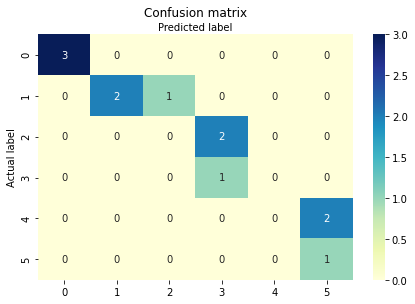

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

***Okay,so what can you see from the Heatmap above?***
***Does Logistic Regression looks like the best approach with this heatmap?**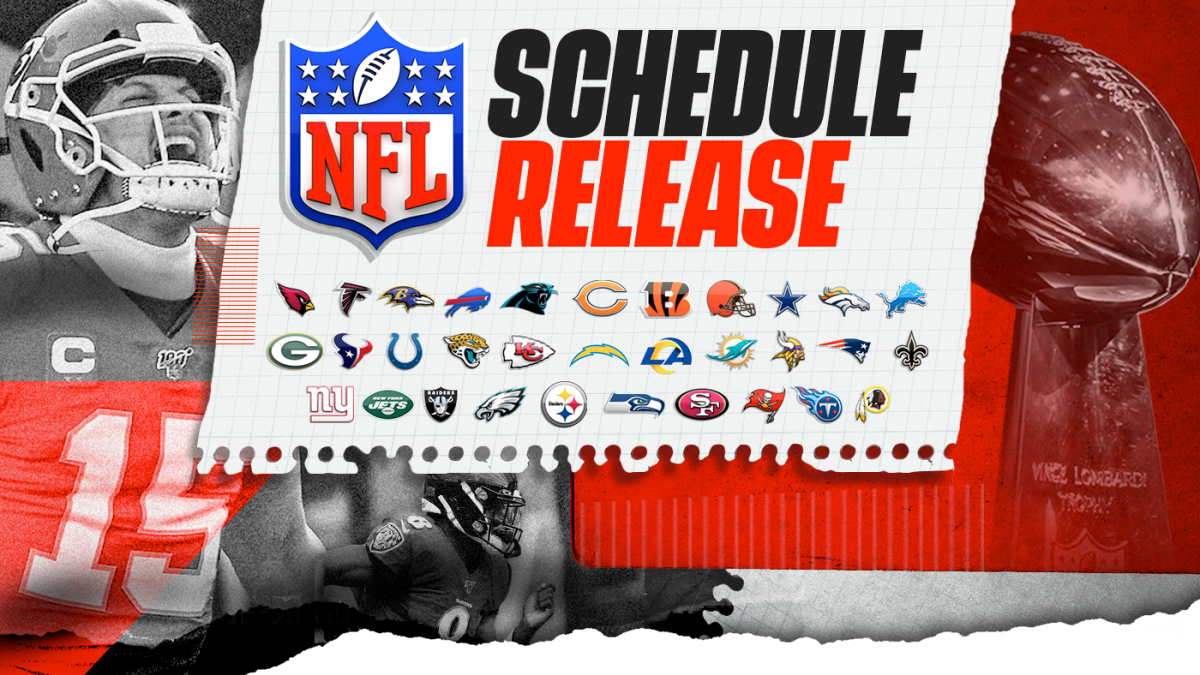